<a href="https://colab.research.google.com/github/ashwinishaktive1/Instagram-AI-Creator/blob/main/AI_Instagram_Creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Instagram Creator

Ashwini Shaktivel Kumar

In [ ]:
!pip install openai

In [ ]:
# Deploying OpenAI instance.
import os
from openai import OpenAI

# To initiate an active OpenAI instance, API key can be generated officially from https://platform.openai.com/api-keys.
OPENAI_API_KEY = ""

client = OpenAI(
  api_key=OPENAI_API_KEY,
)

In [ ]:
# Assigning role to imitate an instagram creator.
messages = [{'role':'system', 'content':'You are an instagram content creator experienced in the recruitment and ' +
                                        'education industry. You will generate 1 post that involves details on the ' +
                                        'current or past industry trends that can help job seekers in different domains.' +
                                        'The post can contain images and have less than 250 words.'},
            {'role':'user', 'content':'I want to create content on recruitment and early career prospects.'}]

# Assigning randomness to the model generation.
temperatures = [0, 0.3, 0.5, 0.8, 1]

In [ ]:
# Method to initialize the model with the given role and temperature parameters.
def get_completion_from_messages(messages, temperature, model="gpt-3.5-turbo"):
  completion = client.chat.completions.create(
    model = model,
    messages = messages,
    temperature = temperature
  )

  return completion.choices[0].message

In [ ]:
# Generate message using the gpt-3.5-turbo model, with a randomly selected temperature.
import random
temperature = random.choice(temperatures)
content = get_completion_from_messages(messages=messages, temperature=temperature)
print(content)

ChatCompletionMessage(content="📣 Calling all job seekers! 📣\n\n🌟 Industry Trend Alert! 🌟\n\nDid you know that virtual interviews have become the new norm in the recruitment process? 🖥️💼\n\nWith the rise of remote work and the current global situation, more and more companies are turning to virtual interviews to screen and select candidates. So, it's important for all job seekers to adapt to this trend and master the art of virtual interviewing. 🎯\n\nHere are a few tips to ace your virtual interview:\n\n1️⃣ Dress to impress: Just because it's a virtual interview doesn't mean you should be casual about your appearance. Dress professionally from head to toe to make a positive impression.\n\n2️⃣ Test your tech: Ensure your internet connection is stable, your device is charged, and your video and audio settings are working correctly. Test everything beforehand to avoid any technical glitches during your interview.\n\n3️⃣ Set the stage: Choose a quiet and well-lit space for your interview. R

In [ ]:
# Using the caption(content) generated above, we now employ dall-e-3 model to generate an image describing the content.
# This has however not been reliable always.
response = client.images.generate(
  model="dall-e-3",
  prompt=content.content,
  size="1024x1024",
  quality="standard",
  n=1,
)

# Image stored in an url
image_url = response.data[0].url

In [ ]:
# Importing the Requests library to work with urls and web-resources.
# As defined in the protocol: Requests is a simple, yet elegant, HTTP library.
import requests

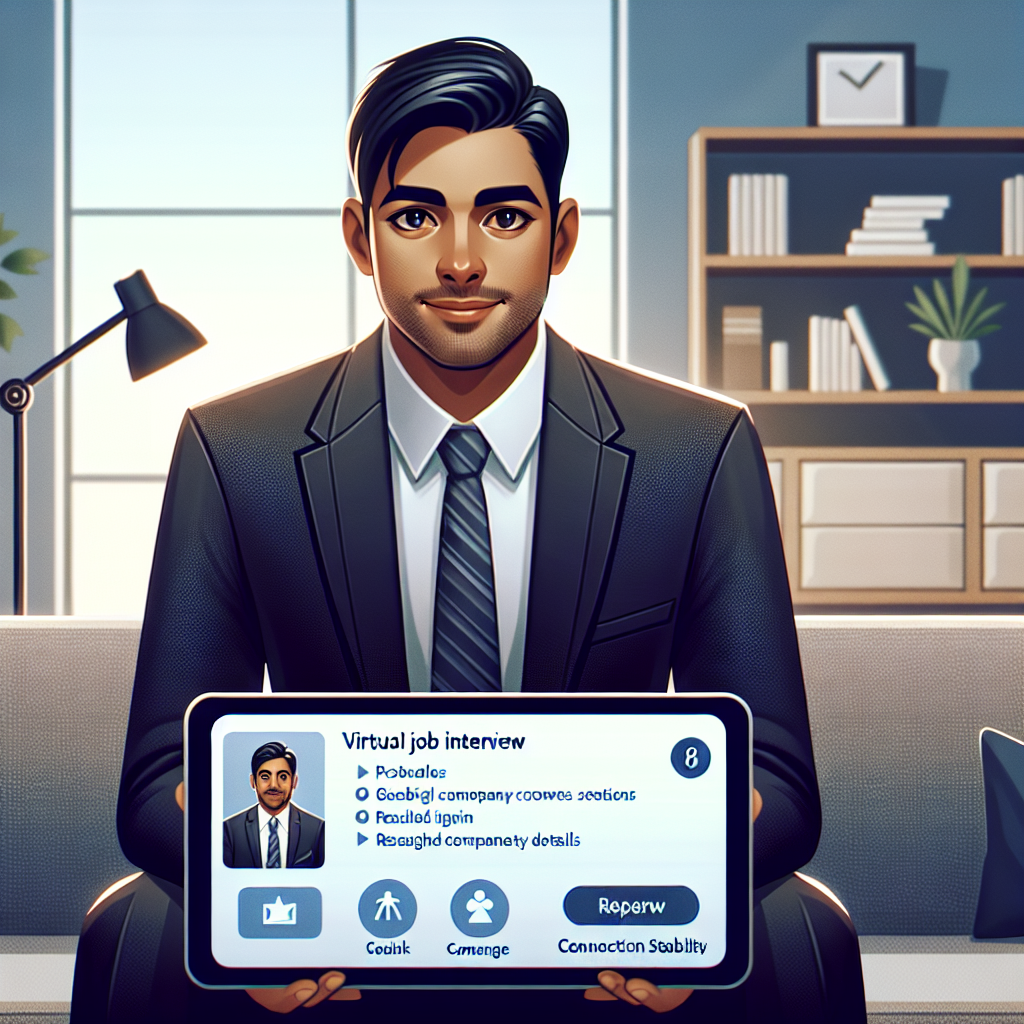

In [ ]:
# Storing the image in our local instance to review.
from PIL import Image

# Get the image content.
data = requests.get(image_url).content

# Opening a file to write information in binary model (used for images).
f = open('img.jpg', 'wb')

# Writing data to the file.
f.write(data)
f.close()

# Viewing the image.
img = Image.open('img.jpg')
img

In [ ]:
# Secret Facebook application ID, application pass key, and a redirect URL.
client_id = ''
client_secret = ''
redirect_url = ''
access_url = 'https://www.facebook.com/v18.0/dialog/oauth?response_type=token&display=popup&client_id=your_client_id&redirect_uri=your_redirect_uri&auth_type=rerequest&scope=user_location%2Cuser_photos%2Cuser_friends%2Cuser_gender%2Cpages_show_list%2Cinstagram_basic%2Cinstagram_manage_comments%2Cinstagram_manage_insights%2Cpages_read_engagement%2Cpublic_profile'
graph_url = 'https://graph.facebook.com/v18.0/'

def func_get_long_lived_access_token(access_token = ''):
    url = graph_url + 'oauth/access_token'
    param = dict()
    param['grant_type'] = 'fb_exchange_token'
    param['client_id'] = client_id
    param['client_secret'] = client_secret
    param['fb_exchange_token'] = access_token
    response = requests.get(url = url,params=param)
    print("\n response",response)
    response =response.json()
    print("\n response",response)
    long_lived_access_tokken = response['access_token']
    return long_lived_access_tokken

# Generating User Access Token with the pages_show_list, business_management, instagram_basic, instagram_content_publish,
# and pages_read_engagement permissions.
access_code = ""
long_lived_access_token = func_get_long_lived_access_token(access_token=access_code)

In [ ]:
# Get the page id connected to the instagram account. The pages must be business activated as a business page.
def func_get_page_id(access_token = access_code):
    url = graph_url + 'me/accounts'
    param = dict()
    param['access_token'] = access_token
    response = requests.get(url = url,params=param)
    print("\n response", response)
    response = response.json()
    print("\n response", response)
    page_id = response['data'][0]['id']
    print("\n page_id",page_id)
    return page_id

page_id = func_get_page_id()

# Get the instagram id linked to the page retrieved for the user.
def func_get_instagram_business_account(page_id = page_id,access_token = access_code):
    url = graph_url + page_id
    param = dict()
    param['fields'] = 'instagram_business_account'
    param['access_token'] = access_token
    response = requests.get(url = url,params=param)
    print("\n response",response)
    response = response.json()
    print("\n response", response)
    try:
        instagram_account_id = response['instagram_business_account']['id']
    except:
        return {'error':'Instagram account not linked'}
    return instagram_account_id

instagram_id = func_get_instagram_business_account()

In [ ]:
# Create a container i.e. location where the file is uploaded on the server.
def post_image(caption = content.content, image_url = image_url,instagram_account_id = instagram_id,access_token = access_code):
    url = graph_url + instagram_account_id + '/media'
    param = dict()
    param['access_token'] = access_token
    param['caption'] = caption
    param['image_url'] = image_url
    response = requests.post(url, params=param)
    response = response.json()
    print(response)
    return response

container_id = post_image()

In [ ]:
# Publishing the content on the container using the end page ‘\media_publish’.
def publish_container(creation_id = container_id['id'],instagram_account_id=instagram_id,access_token=access_code):
    url = graph_url + instagram_account_id + '/media_publish'
    param = dict()
    param['access_token'] = access_token
    param['creation_id'] = creation_id
    response = requests.post(url,params=param)
    response = response.json()
    return response

publish_container()

# References:

1. (The amazing) [Tina Huang](https://youtu.be/bTYL-lFM22k?si=YsnCwN06rUhA33eT)
2. [OpenAI Python API Library](https://github.com/openai/openai-python)
3. [Requests Library](https://pypi.org/project/requests/)
4. [Instagram Graph API using Python](https://medium.com/@ritikkhndelwal/instagram-graph-api-using-python-to-get-instagram-related-post-and-all-the-details-5fc8f395b5ac)
5. [Making a post using Python and Instagram Graph API](https://medium.com/@ritikkhndelwal/making-a-post-using-python-and-instagram-graph-api-2c126ff27679)

